# MI matrix to edge list

Variable MI matrix can be seen as a weighted adjacency matrix. Here we transform the MI matrix to an edge list file format.

In [89]:
import os.path
import numpy as np
import pandas as pd
import seaborn as sns

%reload_ext version_information
%version_information numpy, pandas, seaborn

Software versions
Python 2.7.12 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 2.6.32 431.3.1.el6.x86_64 x86_64 with centos 6.8 Final
numpy 1.11.2
pandas 0.19.1
seaborn 0.7.1
Fri Dec 30 14:40:46 2016 EST

# Setup

In [94]:
# Input
FILE = "../reports/Global_MI_btw_covariates.tsv"

# Output
EDGELIST = "../data/Global_MI_btw_covariates.edgelist"

# Parameters
INCLUDE_SELF_LOOP = False
CUTOFF = 0.05

# Load MI matrix

In [16]:
df = pd.read_table(FILE, index_col=0)

# Distribution of MI values

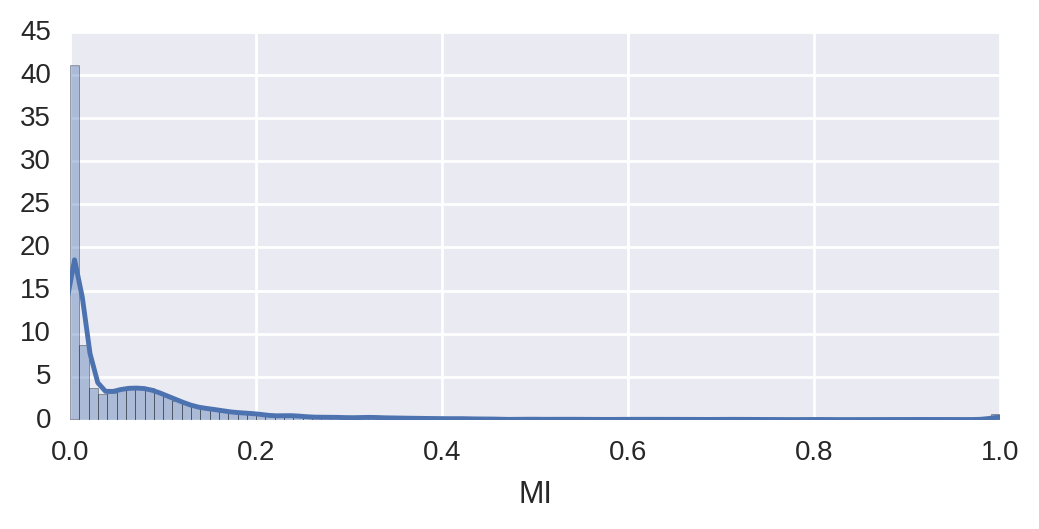

In [142]:
plt.figure(figsize=(6,2.5))
ax = sns.distplot(df.values.flatten(), bins=100)
ax.set_xlim(0.0, 1)
ax.set_xlabel('MI')

# MI matrix to edge list

In [68]:
if INCLUDE_SELF_LOOP:
    df2 = df.mask(~np.triu(np.ones(df.shape)).astype(np.bool))  # mask lower triangle and keep diagonal (self-loop)
else:
    df2 = df.mask(np.tril(np.ones(df.shape)).astype(np.bool))  # mask lower triangle

In [71]:
df3 = df2.stack().reset_index()  # to edgelist

df3.columns = ['Source', 'Target', 'Weight']
df3['Distance'] = 1 - df3.Weight

# Output edge list

In [88]:
df4 = df3[df3.Weight >= CUTOFF]
df4.to_csv(EDGELIST, sep="\t", index=False)
df4.shape

(4247, 4)

In [97]:
df4 = df3[df3.Weight >= 0.1]
df4.to_csv(EDGELIST + '.0.1', sep="\t", index=False)
df4.shape

(2344, 4)

In [98]:
df4 = df3[df3.Weight >= 0.2]
df4.to_csv(EDGELIST + '.0.2', sep="\t", index=False)
df4.shape

(833, 4)

In [99]:
df4 = df3[df3.Weight >= 0.3]
df4.to_csv(EDGELIST + '.0.3', sep="\t", index=False)
df4.shape

(426, 4)